# NAME: JAYASREE S

# GRIP @ THE SPARKS FOUNDATION

# Data Science and Business Analytics Intern

# Prediction using Decision Tree Algorithm
                        (Level - Intermediate)

In [29]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

# Reading the data

In [5]:
data = pd.read_csv("C:/Users/HP/OneDrive/Desktop/Intershala/GRIP @ TSF/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
data.shape

(150, 6)

In [9]:
data.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [12]:
data['Species_class']=np.where(data.Species=='Iris-virginica',1,np.where(data.Species=='Iris-versicolor',2,3))
data.Species_class.value_counts()

3    50
2    50
1    50
Name: Species_class, dtype: int64

In [13]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'Species_class'],
      dtype='object')

# Finding the correlation matrix

In [14]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_class
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,-0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,-0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,-0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,-0.956464
Species_class,-0.942830,-0.782561,0.419446,-0.949043,-0.956464,1.000000


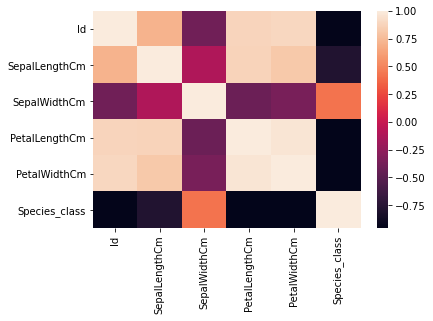

In [15]:
sns.heatmap(data.corr())

# Data Preprocessing

In [16]:
target=data['Species']
df=data.copy()
df=df.drop('Species', axis=1)
df.shape

(150, 6)

In [19]:
#defingi the attributes and labels
X=data.iloc[:, [0,1,2,3]].values
le=LabelEncoder()
data['Species']=le.fit_transform(data['Species'])
Y=data['Species'].values
data.shape

(150, 7)

# Training the model

In [20]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)
print("Traingin split:",X_train.shape)
print("Testin spllit:",X_test.shape)

Traingin split: (120, 4)
Testin spllit: (30, 4)


# Defining the Decision Tree

In [21]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
print("Decision Tree Classifier created!")

Decision Tree Classifier created!


# Classification report and Confusion Matrix

In [24]:
Y_pred = dtree.predict(X_test)
print("CLASSIFICATION REPORT \n",classification_report(Y_test, Y_pred))

CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [26]:
#confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# Decision Tree

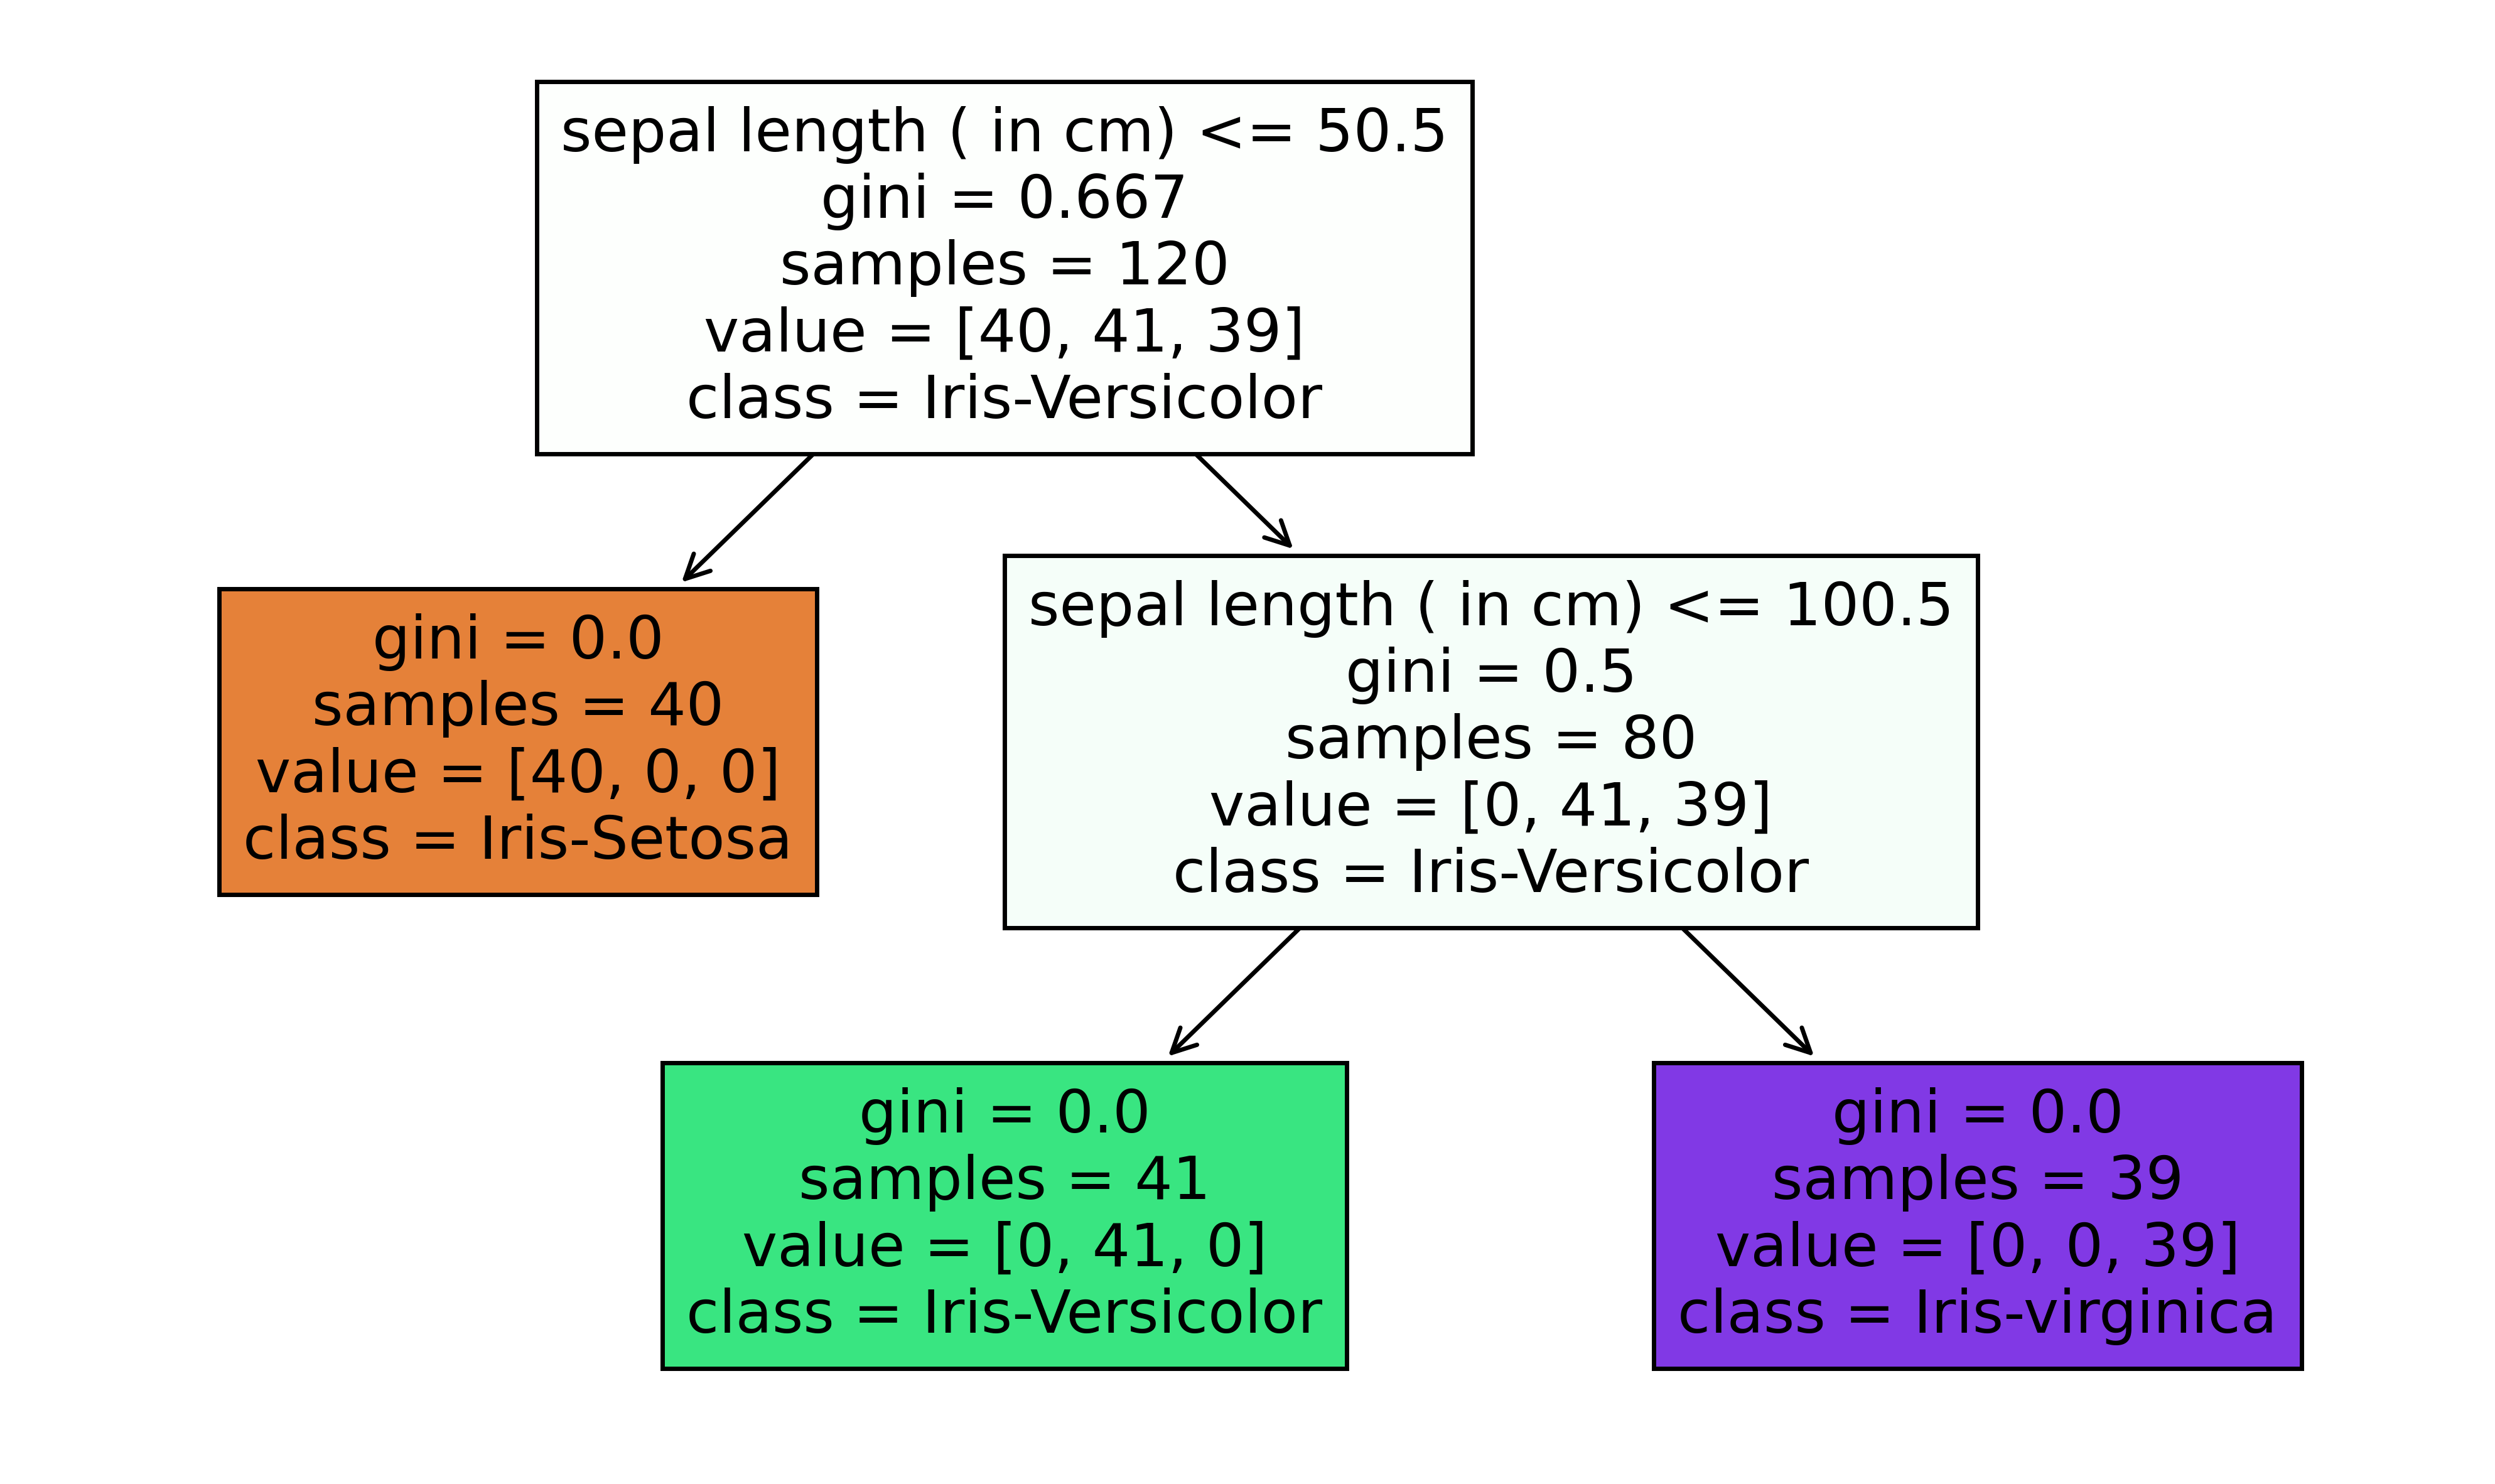

In [33]:
featName=['sepal length ( in cm)','sepal width (in cm)','petal length (in cm)','petal width (in cm)']
clsName=['Iris-Setosa','Iris-Versicolor','Iris-virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,6), dpi = 500)

tree.plot_tree(dtree, feature_names = featName, class_names = clsName, filled = True);
fig.savefig('imagename.png')